In [1]:
import random

# List of words to randomly choose from
word_list = [
    "apple", "banana", "cherry", "dog", "elephant", "flower", "guitar", "house",
    "island", "jungle", "kite", "lemon", "mountain", "notebook", "ocean", "planet",
    "quartz", "river", "sunflower", "tree", "umbrella", "violin", "window", "xylophone",
    "yacht", "zebra"
]

# Parameters
num_sentences = 10  # Number of sentences to generate
words_per_sentence = 10  # Words per sentence

# Generate a text corpus with <s> and </s> tokens
random_corpus = ""
for _ in range(num_sentences):
    sentence = " ".join(random.choices(word_list, k=words_per_sentence))
    random_corpus += f"<s> {sentence} </s>\n"

print(random_corpus)


<s> ocean river tree yacht river quartz flower xylophone umbrella planet </s>
<s> mountain violin kite house dog violin window tree tree lemon </s>
<s> notebook xylophone flower mountain jungle sunflower mountain window cherry cherry </s>
<s> ocean banana planet jungle apple zebra sunflower island dog guitar </s>
<s> cherry notebook house mountain apple kite xylophone elephant umbrella house </s>
<s> river flower kite kite quartz umbrella yacht ocean planet house </s>
<s> jungle house ocean guitar guitar cherry quartz cherry mountain guitar </s>
<s> xylophone violin guitar island yacht yacht guitar lemon umbrella apple </s>
<s> sunflower window elephant zebra xylophone quartz kite kite violin planet </s>
<s> umbrella flower house umbrella mountain xylophone river planet mountain mountain </s>



In [113]:
from collections import defaultdict
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 

class Unigram:
    def __init__(self): 
        self.N_counts = 0
        self.word_counts = defaultdict(int)  # Use defaultdict to handle missing words

    def train(self, corpus: str):
        for word in corpus.split():
            self.word_counts[word] += 1
            self.N_counts += 1 

    @property
    def V_counts(self):
        return len(self.word_counts)  # Correct the method call to get the length of keys

    def predict(self, word) -> float:
        if word in self.word_counts:
            return float(self.word_counts[word] / self.N_counts)
        return 0.0  # Return 0 if the word is not in the dictionary
    
    def plot_dict(self):
        # Create a DataFrame for visualization
        word_freqs = list(self.word_counts.items())
        words, freqs = zip(*word_freqs)
        
        # Create a DataFrame for easier plotting with seaborn
        df = pd.DataFrame({'Word': words, 'Frequency': freqs})
        
        # Sort the DataFrame by frequency for better visualization
        df = df.sort_values(by='Frequency', ascending=False)

        # Plot the word frequencies
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Frequency', y='Word', data=df.head(20))  # Show top 20 words
        plt.title('Top 20 Words by Frequency')
        plt.xlabel('Frequency')
        plt.ylabel('Word')
        plt.show()

    def generate_random_word(self):
        total_count = self.N_counts  # Total count of all bigrams
        unigram_freqs = list(self.word_counts.items())
        unigram, freqs = zip(*unigram_freqs)
        probabilities = [freq / total_count for freq in freqs]  # Normalize frequencies to probabilities
        
        # Randomly select a bigram based on the probability distribution
        chosen_unigram = random.choices(unigram, weights=probabilities, k=1)[0]
        return chosen_unigram 
        

    def generate_random_sentence(self, length=10):
        sentence = []
        for _ in range(length):
            sentence += [self.generate_random_word()]
        return ' '.join(sentence)
        
    
class Bigram:
    def __init__(self): 
        self.N_counts = 0
        self.word_counts = defaultdict(int)  # Use defaultdict to handle missing words

    def bigram(self, words):
        words = words.split() 
        return (words[0], words[1])

    def bigrams(self, corpus: str):
        words = corpus.split()
        return list(zip(words, words[1:]))

    def train(self, corpus: str):
        for words in self.bigrams(corpus):
            self.word_counts[words] += 1
            self.N_counts += 1 

    @property
    def V_counts(self):
        return len(self.word_counts)  # Correct the method call to get the length of keys

    def predict(self, words) -> float:
        words = self.bigram(words)
        if words in self.word_counts:
            return float(self.word_counts[words] / self.N_counts)
        return 0.0  # Return 0 if the word is not in the dictionary
    
    def plot_dict(self):
        # Create a DataFrame for visualization
        bigram_freqs = list(self.word_counts.items())
        bigrams, freqs = zip(*bigram_freqs)
        
        # Prepare the bigrams as strings for better readability
        bigram_strings = [' '.join(bigram) for bigram in bigrams]
        
        # Create a DataFrame for easier plotting with seaborn
        df = pd.DataFrame({'Bigram': bigram_strings, 'Frequency': freqs})
        
        # Sort the DataFrame by frequency for better visualization
        df = df.sort_values(by='Frequency', ascending=False)

        # Plot the bigram frequencies
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Frequency', y='Bigram', data=df.head(20))  # Show top 20 bigrams
        plt.title('Top 20 Bigrams by Frequency')
        plt.xlabel('Frequency')
        plt.ylabel('Bigram')
        plt.show()

    def generate_random_word(self, word):
        # Generate a list of bigrams starting with the given word
        possible_bigrams = [(first, second) for first, second in self.word_counts.keys() if first == word]
        
        if not possible_bigrams:
            return None  # No bigrams starting with this word

        # Get frequencies of the second words in these bigrams
        second_words = [second for _, second in possible_bigrams]
        second_word_freqs = [self.word_counts[(word, second)] for second in second_words]
        
        # Normalize frequencies to probabilities
        total_count = sum(second_word_freqs)
        probabilities = [freq / total_count for freq in second_word_freqs]

        # Randomly select the next word based on the probability distribution
        chosen_word = random.choices(second_words, weights=probabilities, k=1)[0]
        return chosen_word
    
    def generate_random_sentence(self, start_word, length):
        sentence = [start_word]
        current_word = start_word
        
        # Generate a sentence of the specified length
        for _ in range(length - 1):
            next_word = self.generate_random_word(current_word)
            if next_word is None:
                break  # Stop if there are no possible continuations
            sentence.append(next_word)
            current_word = next_word
        
        return ' '.join(sentence)


In [114]:
unigram = Unigram()
unigram.train(random_corpus)
unigram.predict('river')

0.03333333333333333

In [115]:
bigram = Bigram() 
bigram.train(random_corpus)
bigram.predict("river notebook")

0.0

In [116]:
# Two sensible sentences with 100 words each
corpus_poet = """
<s> The quick brown fox jumps over the lazy dog in the morning, running swiftly through the grassy meadow, chasing after the birds and avoiding the obstacles. The sun shines brightly in the sky as the fox makes its way toward the distant hills, where it can rest in the cool shade of the trees. </s>
<s> In the heart of the city, people bustle about their daily routines, walking briskly along the sidewalks, their footsteps echoing on the pavement. The sound of car engines hums in the background as the hustle and bustle of urban life continues, with people shopping, working, and enjoying their time. </s>
"""
corpus_science = """
<s> The process of photosynthesis is crucial for plant life, as it allows plants to convert light energy into chemical energy. Using chlorophyll, plants absorb sunlight and combine it with carbon dioxide from the atmosphere and water from the soil. The result is glucose, a simple sugar that plants use for growth and development, and oxygen, which is released into the air. This process not only sustains plant life but also supports the food chain and provides oxygen for all aerobic organisms on Earth. </s>
<s> Quantum mechanics describes the behavior of particles at the atomic and subatomic levels. Unlike classical mechanics, quantum mechanics introduces the concept of wave-particle duality, where particles can exhibit properties of both waves and particles. This behavior is governed by probabilities, and phenomena like superposition and entanglement challenge our classical understanding of reality. The uncertainty principle, proposed by Heisenberg, states that certain properties, such as position and momentum, cannot be precisely measured simultaneously. These principles form the foundation for technologies like quantum computing and quantum cryptography. </s>
"""

# Print the generated corpus
print(len(corpus_poet.split()))
print(len(corpus_science.split()))


107
172


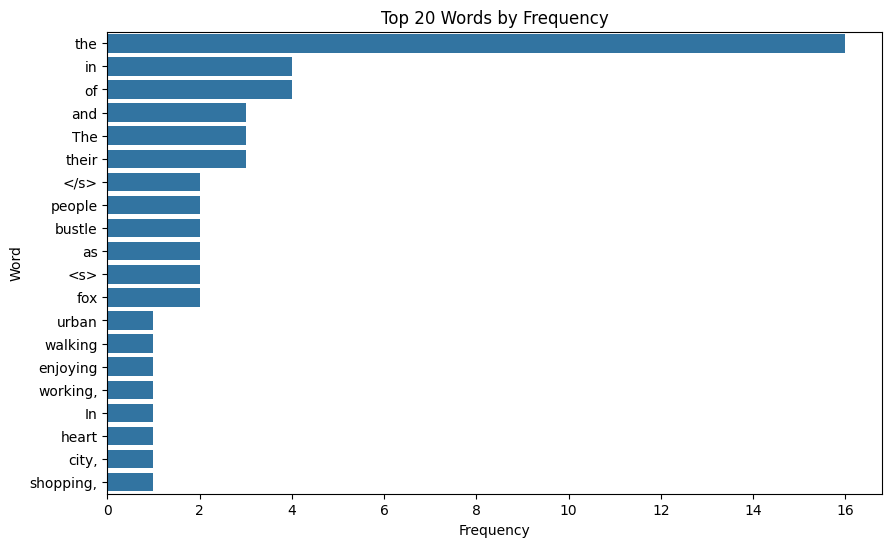

In [117]:
unigram_poet = Unigram() 
unigram_poet.train(corpus_poet)
unigram_poet.plot_dict()

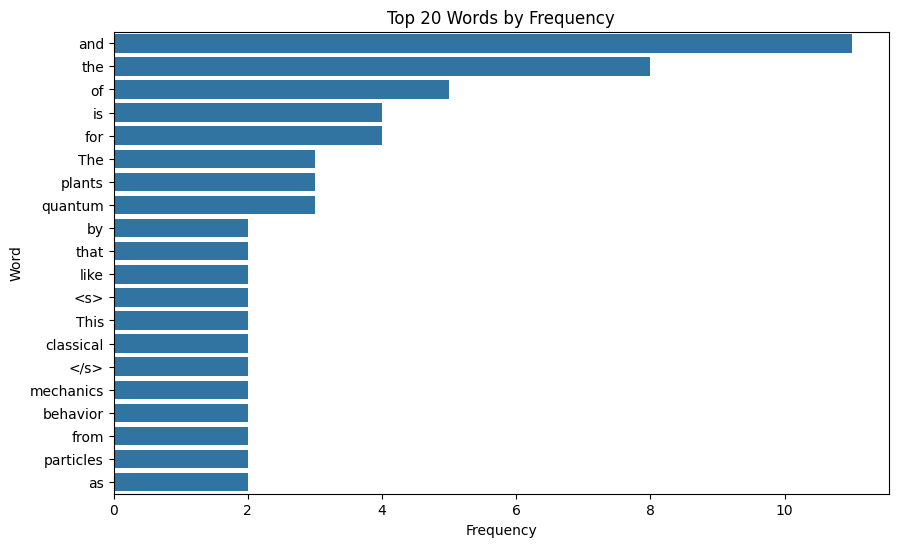

In [118]:
unigram_sci = Unigram() 
unigram_sci.train(corpus_science)
unigram_sci.plot_dict()

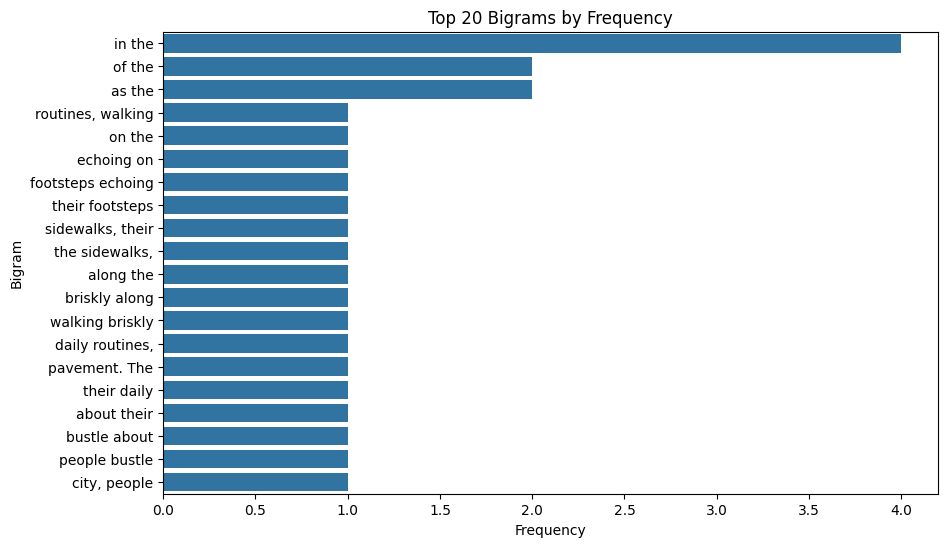

In [119]:
bigram_poet = Bigram()
bigram_poet.train(corpus_poet)
bigram_poet.plot_dict()

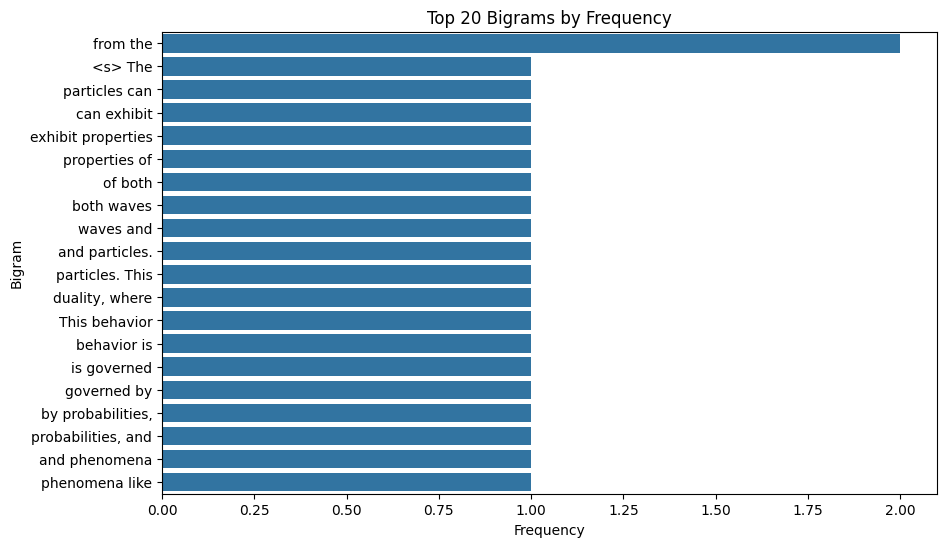

In [120]:
bigram_science = Bigram()
bigram_science.train(corpus_science)
bigram_science.plot_dict()

In [121]:
unigram_poet.generate_random_sentence() 

'time. shade sky shines running over echoing of the their'

In [124]:
bigram_science.generate_random_sentence('allows', 10)

'allows plants to convert light energy into the foundation for'

In [141]:
import math

def perplexity(model, test_string: str, model_type="bigram"): 
    # Tokenize the test string into words
    words = test_string.split()
    N = len(words)
    
    # Initialize the log probability sum
    log_prob_sum = 0.0
    
    if model_type == "bigram":
        # Calculate the log probability for each bigram in the test string
        for i in range(1, N):
            bigram = words[i-1] + ' ' + words[i]
            prob = model.predict(bigram)  # Use the model's `predict` method to get P(w_i | w_{i-1})
            
            # If the bigram probability is 0 (i.e., unseen bigram), set log_prob_sum to infinity
            if prob == 0:
                log_prob_sum = float('inf')
                break
            
            # Add the log probability of the bigram
            log_prob_sum += math.log2(prob)
    
    elif model_type == "unigram":
        # Calculate the log probability for each word in the test string (unigram model)
        for word in words:
            prob = model.predict(word)  # Use the model's `predict` method to get P(w_i)
            
            # If the word probability is 0 (i.e., unseen word), set log_prob_sum to infinity
            if prob == 0:
                log_prob_sum = float('inf')
                break
            
            # Add the log probability of the word
            log_prob_sum += math.log2(prob)

    # Calculate perplexity
    if log_prob_sum == float('inf'):
        return float('inf')  # If any probability is 0, return inf (high perplexity)
    
    # Average log probability
    avg_log_prob = log_prob_sum / N  # N is the number of words for both bigram and unigram
    
    # Return the perplexity
    return 2 ** (-avg_log_prob)




In [142]:
perplexity(unigram_poet, 'the in of the', model_type='unigram')

13.375000000000004

In [145]:
perplexity(bigram_science, 'Quantum mechanics describes the behavior')

61.150060114695655

In [139]:
bigram.word_counts[bigram_poet.bigram('the in')] 

0